In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
dataset=pd.read_csv('/content/Crop_recommendation.csv')
dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
dataset.value_counts('label')

,count
label,
apple,100
banana,100
blackgram,100
chickpea,100
coconut,100
coffee,100
cotton,100
grapes,100
jute,100


In [ ]:
dataset.shape

(2200, 8)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
dataset['label']=dataset['label'].replace({
    'apple':          1,
    'banana':         2,
    'rice':           3,
    'pomegranate':    4,
    'pigeonpeas':     5,
    'papaya':         6,
    'orange':         7,
    'muskmelon':      8,
    'mungbean':       9,
    'mothbeans':      10,
    'mango':          11,
    'maize':          12,
    'lentil':         13,
    'kidneybeans':    14,
    'jute':           15,
    'grapes':         16,
    'cotton':         17,
    'coffee':         18,
    'coconut':        19,
    'chickpea':       20,
    'blackgram':      21,
    'watermelon':     22
})

<ipython-input-8-0a5ebdd9cba6>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['label']=dataset['label'].replace({


In [ ]:
dataset.value_counts('label')

,count
label,
1,100
2,100
3,100
4,100
5,100
6,100
7,100
8,100
9,100


In [ ]:
X=dataset.drop(['label'],axis=1)
Y=dataset['label']
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [ ]:
scale=StandardScaler()
scaled_X=scale.fit_transform(X)
X_train,X_test,Y_train,Y_test=train_test_split(scaled_X,Y,test_size=0.2,random_state=31)
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
prediction_on_training_data=model.predict(X_train)
accuracy_on_training_data=accuracy_score(prediction_on_training_data,Y_train)
print("the accuracy score on training data: ",accuracy_on_training_data)

the accuracy score on training data:  0.9744318181818182


In [ ]:
prediction_on_testing_data = model.predict(X_test)
accuracy_on_testing_data = accuracy_score(prediction_on_testing_data,Y_test)
print("the accuracy score on testing data: ",accuracy_on_testing_data)

the accuracy score on testing data:  0.9840909090909091


In [ ]:
input=(24,6,32,28.11321494,90.01734526,6.387067562,172.48136409999995)

input_as_np_array=np.asarray(input)
input_array_reshaped=input_as_np_array.reshape(1,-1)
input_data=scale.transform(input_array_reshaped)

prediction=model.predict(input_data)
print(prediction)
index = int(prediction[0] - 1)
crops = ['apple','banana','rice','pomegranate','pigeonpeas','papaya','orange','muskmelon','mungbean','mothbeans','mango','maize',
         'lentil','kidneybeans','jute','grapes','cotton','coffee','coconut','chickpea','blackgram','watermelon']
print(crops[index])

[19]
coconut


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


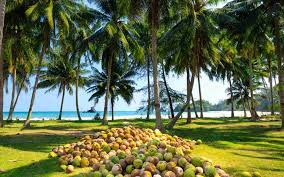

In [ ]:
from PIL import Image
image = Image.open(f"/content/{crops[index]}.jpg")
display(image)

In [ ]:
import pickle
pickle.dump(model, open('model1.pkl', 'wb'))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators=100, random_state=42)
classifier2.fit(X_train, Y_train)
y_pred = classifier2.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 98.86%


In [ ]:
pickle.dump(classifier2, open('model2.pkl', 'wb'))

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
svm.fit(X_train, Y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 97.95%


In [ ]:
pickle.dump(svm, open('model3.pkl', 'wb'))